# QTA 招新笔试

## 题目概述

CIFAR-10 数据集由 10 个类的 60000 个 32x32 彩色图像组成，每个类有 6000 个图像。有 50000 个训练图像和 10000 个测试图像。数据集分为 5 个训练批次和 1 个测试批次，每个批次有 10000 个图像。

与 MNIST 数据集中目比， CIFAR-10 有以下特点：

1. CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是1通道的灰度图像。
2. CIFAR-10 的图片尺寸为 32 × 32 ，而 MNIST 的图片尺寸为 28 × 28 ，比 MNIST 稍大。
3. 相比于手写字符， CIFAR-10 是现实世界中真实的物体，不仅噪声很大，而且物体的比例、特征都不尽相同。

## 题目要求

使用常见的深度学习框架（Tensorflow/PyTorch）搭建一个基于 CIFAR-10 的分类模型，要求对模型进行训练并记录下训练集与测试集上的 loss 和 acc 结果。

注：所构建模型在数据自带的测试集上的分类准确率至少达到 80%。

## 数据链接

[CIFAR-10](https://pytorch.org/docs/0.3.0/torchvision/datasets.html#cifar)

## 编程作答

### 数据集获取

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10

# Normalization transform
__transformer = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]
)

# Get CIFAR-10 dataset
train_data = CIFAR10(root='./data', train=True, download=True, transform=__transformer)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=4)

test_data = CIFAR10(root='./data', train=False, download=True, transform=__transformer)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 获取加速设备

In [2]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print("Device:", device)

Device: cuda:0


### 模型构建

In [3]:
from model import DenseNet121
from torch.optim.lr_scheduler import MultiStepLR

model = DenseNet121().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = MultiStepLR(optimizer, milestones=[50,75], gamma=0.1)
loss_func = torch.nn.CrossEntropyLoss()

### 模型训练

In [4]:
from trainer import Trainer

trainer = Trainer(model, optimizer, loss_func, device, train_loader, test_loader, scheduler, epochs=100)
trainer.train()

[Epoch 1/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3583
Train Loss: 0.010619, Train Accuracy: 50.66%
Test Loss: 0.016214, Test Accuracy: 44.72%
[Epoch 2/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 0.7407
Train Loss: 0.005792, Train Accuracy: 73.68%
Test Loss: 0.005987, Test Accuracy: 73.47%
[Epoch 3/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 0.5186
Train Loss: 0.004056, Train Accuracy: 81.85%
Test Loss: 0.004880, Test Accuracy: 78.52%
[Epoch 4/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 0.3915
Train Loss: 0.003063, Train Accuracy: 86.44%
Test Loss: 0.006074, Test Accuracy: 74.50%
[Epoch 5/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2930
Train Loss: 0.002293, Train Accuracy: 89.88%
Test Loss: 0.006086, Test Accuracy: 76.43%
[Epoch 6/100]
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2246
Train Loss: 0.001757, Trai

### 模型测试

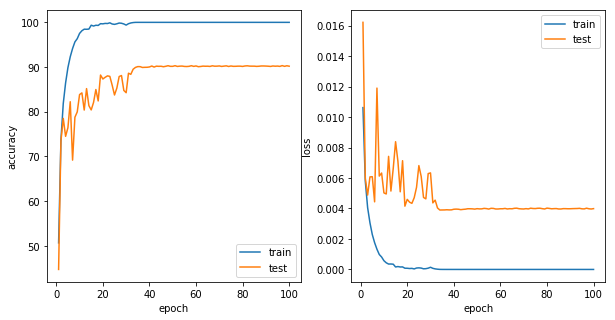

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# draw the accuracy curve and loss curve respectively
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 101), trainer.train_acc_list, label='train')
plt.plot(np.arange(1, 101), trainer.test_acc_list, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 101), trainer.train_loss_list, label='train')
plt.plot(np.arange(1, 101), trainer.test_loss_list, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

### [optional] 保存模型

In [6]:
torch.save(model.state_dict(), 'model.pt')

### [optional] 测试模型
该模块可单独执行

In [7]:
import torch
from tester import Tester
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from model import DenseNet121

device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print("Device:", device)

model = DenseNet121().to(device)
model.load_state_dict(torch.load('model.pt'))
loss_func = torch.nn.CrossEntropyLoss()

__transformer = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]
)

test_data = CIFAR10(root='./data', train=False, download=True, transform=__transformer)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False, num_workers=4)

tester = Tester(model, loss_func, device, test_loader)

tester.test()

Device: cuda:0
Files already downloaded and verified
10000/10000 [==============================] - 3s 340us/step - acc: 0.4566
Test Loss: 0.0040, Test Accuracy: 90.19%
